In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5840 - accuracy: 0.4185 - val_loss: 1.3294 - val_accuracy: 0.5210
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3003 - accuracy: 0.5319 - val_loss: 1.1964 - val_accuracy: 0.5686
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1615 - accuracy: 0.5860 - val_loss: 1.0858 - val_accuracy: 0.6177
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0647 - accuracy: 0.6215 - val_loss: 0.9877 - val_accuracy: 0.6470
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9868 - accuracy: 0.6481 - val_loss: 0.9797 - val_accuracy: 0.6525
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9258 - accuracy: 0.6682 - val_loss: 0.9317 - val_accuracy: 0.6751
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8761 - accuracy: 0.6877 - val_loss: 0.8630 - val_accuracy:

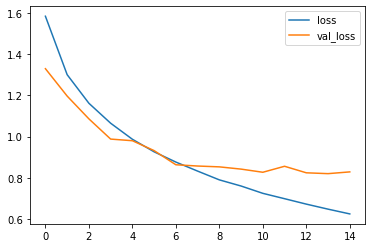

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

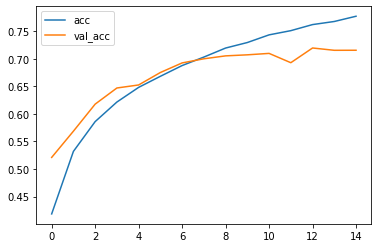

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix



p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
print(cm)



[[784  18  26  11  14   6  17   9  80  35]
 [ 21 825   4   7   4   2  11   1  38  87]
 [ 62   5 568  67 117  60  58  32  25   6]
 [ 29   7  52 484  93 157 101  28  26  23]
 [ 25   3  59  45 709  29  53  57  17   3]
 [ 10   4  46 169  64 584  42  58  14   9]
 [  6   6  30  54  53  24 803   7  14   3]
 [ 23   1  27  38  80  50  16 747   6  12]
 [ 52  32  10   9   5   4  11   4 854  19]
 [ 43  70   3  14   5   5  11  12  40 797]]


In [10]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

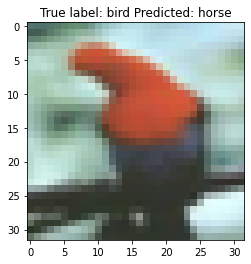

In [11]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));